In [25]:
!pip install pandas
!pip install scikit-learn

In [26]:
import pandas as pd

# Load the CSV file
file_path = 'C:\\Users\\gapar\\Downloads\\external_df.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,problem,level,type
0,Kevin Kangaroo begins hopping on a number line...,Level 5,Algebra
1,The ratio of the areas of two squares is $\fra...,Level 4,Algebra
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,Algebra
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,Algebra
4,James has a total of 66 dollars in his piggy b...,Level 2,Algebra


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gapar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing: Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_12952\4150283802.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


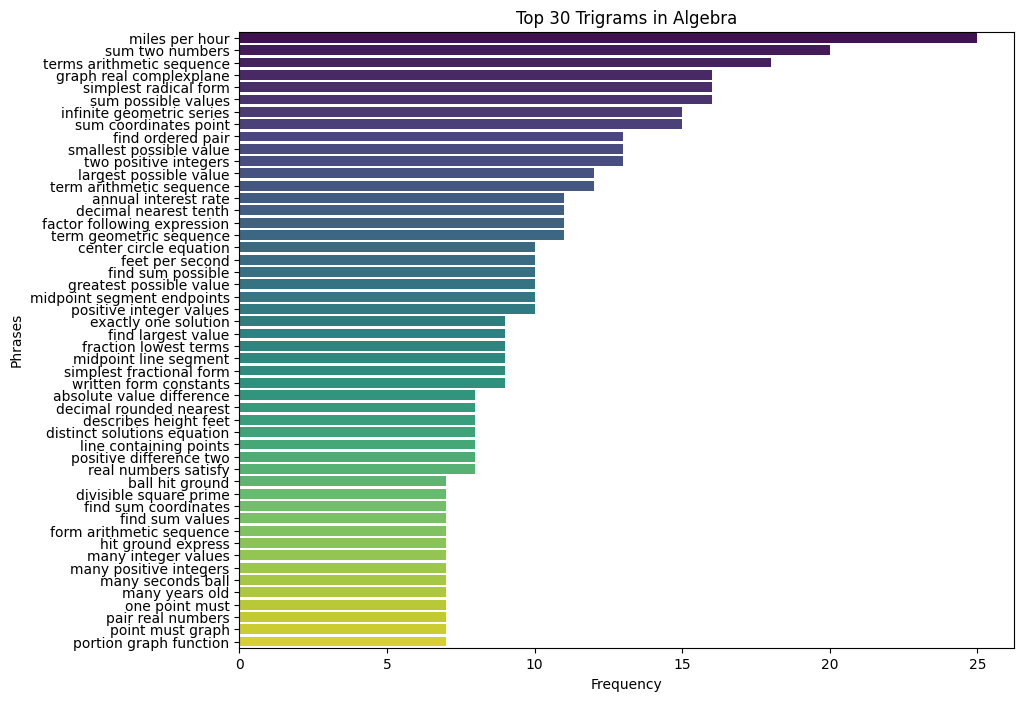

Processing: Counting & Probability


C:\Users\gapar\AppData\Local\Temp\ipykernel_12952\4150283802.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


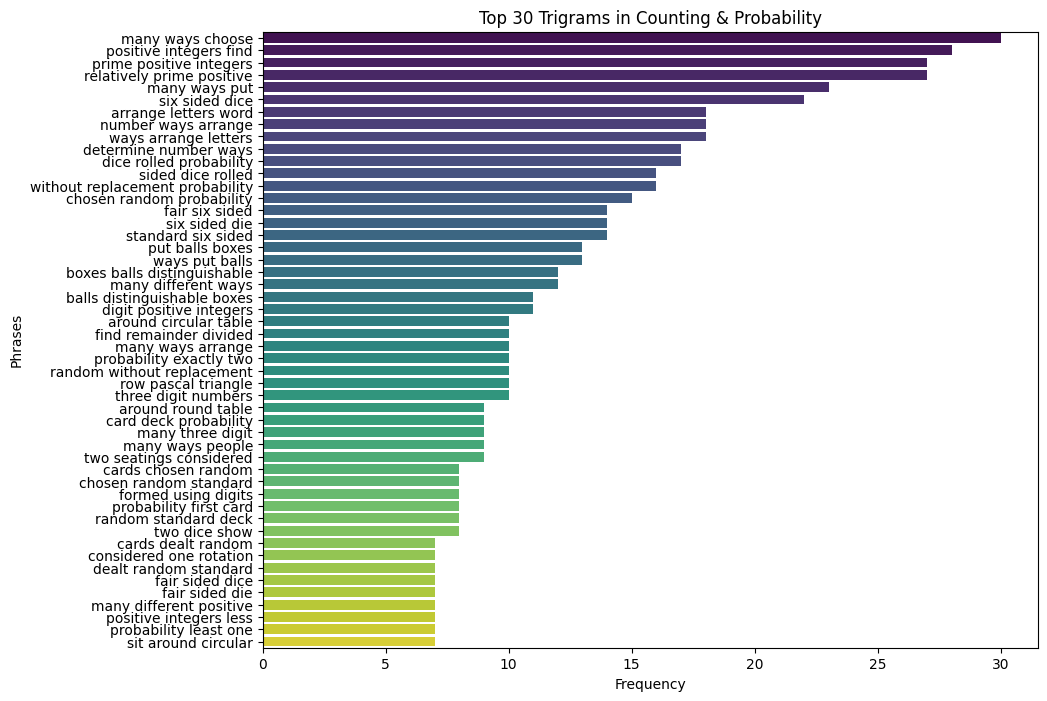

Processing: Geometry


C:\Users\gapar\AppData\Local\Temp\ipykernel_12952\4150283802.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


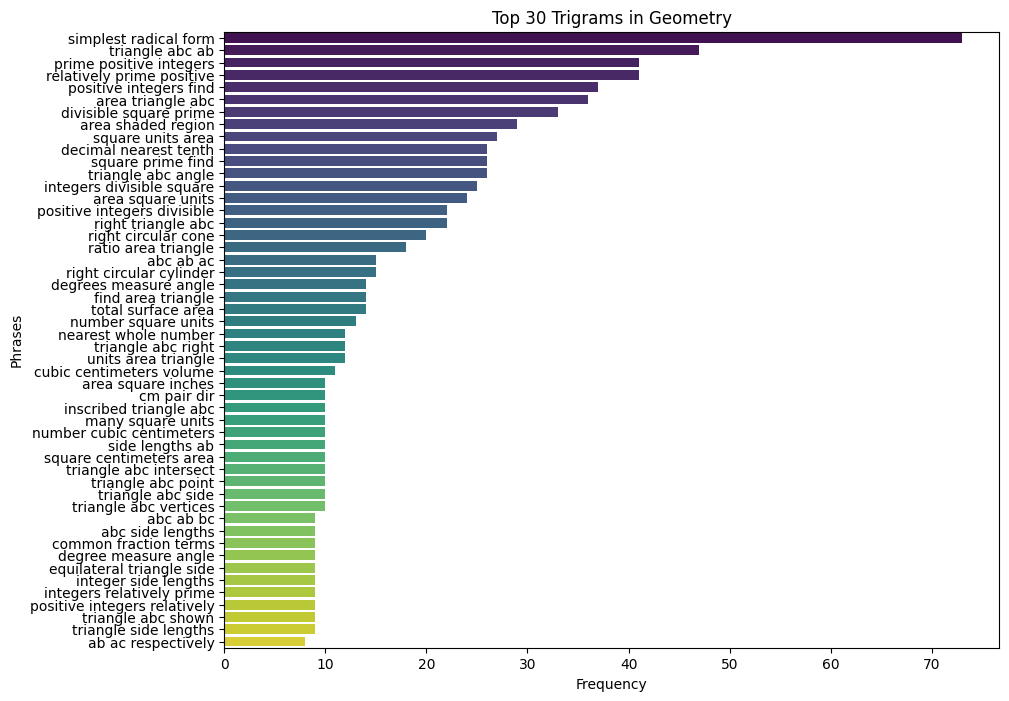

Processing: Intermediate Algebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_12952\4150283802.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


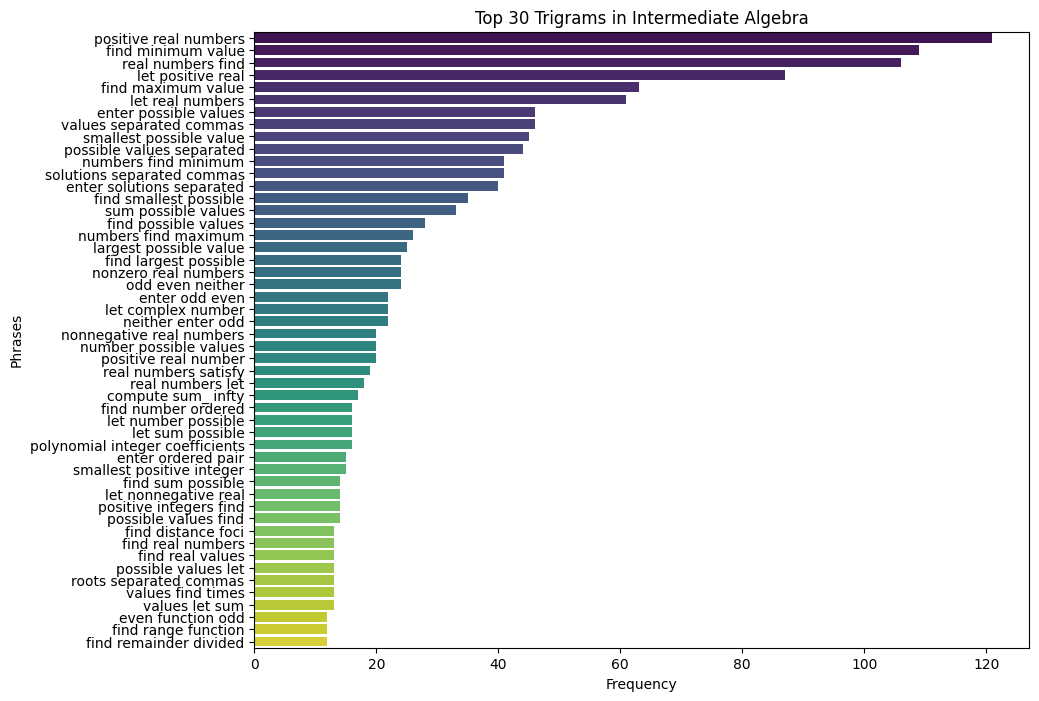

Processing: Number Theory


C:\Users\gapar\AppData\Local\Temp\ipykernel_12952\4150283802.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


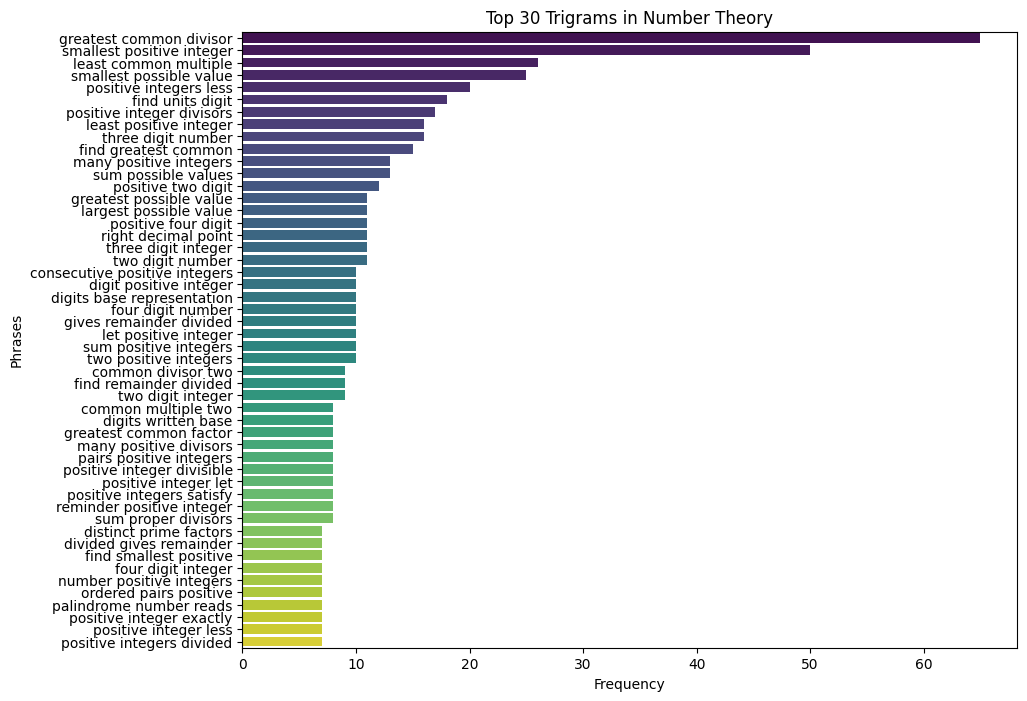

Processing: Prealgebra


C:\Users\gapar\AppData\Local\Temp\ipykernel_12952\4150283802.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


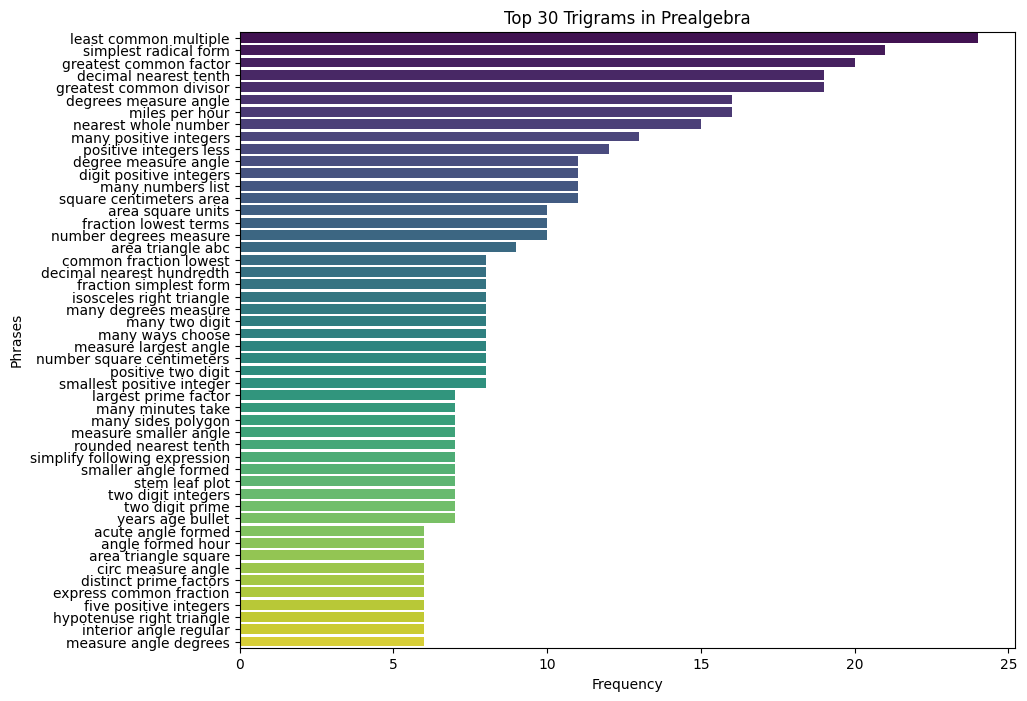

Processing: Precalculus


C:\Users\gapar\AppData\Local\Temp\ipykernel_12952\4150283802.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


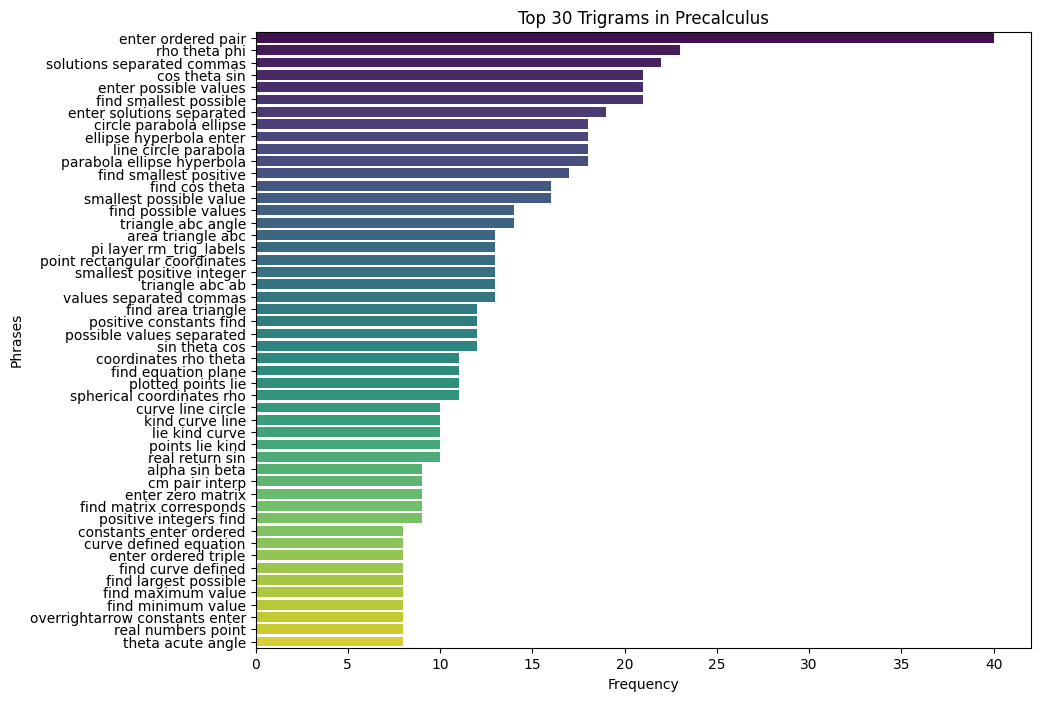

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Ensure NLTK stop words are available
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert set to list
forbidden_words = {'draw', 'ticklength', 'laxis', 'arrowsize', 'black', 'gray',
                   'fill', 'cycle', 'linewidth', 'frac', 'graf', 'red', 'asy', 'pmatrix',
                   'label','sqrt','xmax','func','unitsize','mathop','hline','mathbf','le','begin','end',
                   'letter', 'vmatrix', 'import', 'overline', 'ax','cz', 'bx', 'pa', 'pb', 'pc','ptick',
                   'ticks', 'ybottom', 'arrows', 'ymin', 'xmin', 'ymax', 'ytop', 'xleft', 'dps', 'pen',
                   'yequals', 'bool', 'tickdown', 'answer', 'invisible','ticksarrx', 'ticksarry','gx','gy',
                   'gs', 'ceil', 'void','bottomtop', 'texnormal','wholetickdown','tickspace','ticklen', 
                   'usegrid', 'axispen','xstep', 'axisarrowsize','xaxis','yaxis','xequals','leftright','lceil',
                   'rceil','array', 'textnormal', 'linetype','step','size', 'stickframe', 'true','false','textbf','cdot','pathticks'}

# Load your data (Make sure to adjust the path to where your dataset is located)
# data = pd.read_csv('path_to_your_data.csv')
# Handle missing values by replacing NaNs with an empty string

data['problem'].fillna('', inplace=True)

# Retrieve all unique problem types
problem_types = data['type'].unique()

# Initialize CountVectorizer for unigrams, bigrams, and trigrams

vectorizer_trigrams = CountVectorizer(stop_words=stop_words, ngram_range=(3,3))

# Function to get top 30 features
def get_top_n_features(vectorizer, feature_counts):
    feature_names = vectorizer.get_feature_names_out()
    sum_features = feature_counts.sum(axis=0)
    features_and_counts = sorted(zip(feature_names, sum_features.A1), key=lambda x: x[1], reverse=True)
    
    # Filter out n-grams with repeated words
    filtered_features = [
        feature for feature in features_and_counts
        if not any(word in feature[0].split() for word in forbidden_words)
        and not re.search(r'\d', feature[0])  and len(set(feature[0].split())) == len(feature[0].split())]
    

    
    return filtered_features[:50]

        

# Plotting function
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Phrases')
    plt.show()

# Loop through each problem type
for problem_type in problem_types:
    print(f"Processing: {problem_type}")
    specific_type_data = data[data['type'] == problem_type]['problem']
    
    # Fit and transform the data for each type
    words_counts = vectorizer_words.fit_transform(specific_type_data)
    bigrams_counts = vectorizer_bigrams.fit_transform(specific_type_data)
    trigrams_counts = vectorizer_trigrams.fit_transform(specific_type_data)
    
    # Retrieve and plot top 30 unigrams, bigrams, and trigrams
    top_words = get_top_n_features(vectorizer_words, words_counts)
    top_bigrams = get_top_n_features(vectorizer_bigrams, bigrams_counts)
    top_trigrams = get_top_n_features(vectorizer_trigrams, trigrams_counts)
    
    
    plot_ngrams(top_trigrams, f"Top 30 Trigrams in {problem_type}")
